<a href="https://colab.research.google.com/github/vinitparmar16/Loan-Prediction-Dataset/blob/master/8_puzzle_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using BFS Algorithms to Solve 8-Puzzle in Python**

---



# I. Introduction

The 8-puzzle problem is a puzzle invented and popularized by Noyes Palmer Chapman in the 1870s. It is played on a 3-by-3 grid with 8 square blocks labeled 1 through 8 and a blank square. Your goal is to rearrange the blocks so that they are in order.bold text

# II. Algorithm Review

The searches begin by visiting the root node of the search tree, given by the initial state. 

1.First, we remove a node from the frontier set.

2.Second, we check the state against the goal state to determine if a solution has been found.

3.Finally, if the result of the check is negative, we then expand the node. To expand a given node, we generate successor nodes adjacent to the current node, and add them to the frontier set. Note that if these successor nodes are already in the frontier, or have already been visited, then they should not be added to the frontier again.

This describes the life-cycle of a visit, and is the basic order of operations for search agents in this assignment—(1) remove, (2) check, and (3) expand. In this assignment, we will implement algorithms as described here.

The following algorithms are going to be implemented and taken from the lecture slides from the same course.

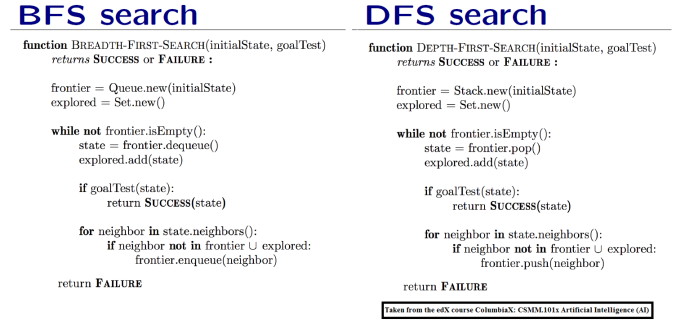

# III. What The Program Need to Output

Example: Breadth-First Search

Suppose the program is executed for breadth-first search starting from the initial state 1,2,5,3,4,0,6,7,8 as follows:
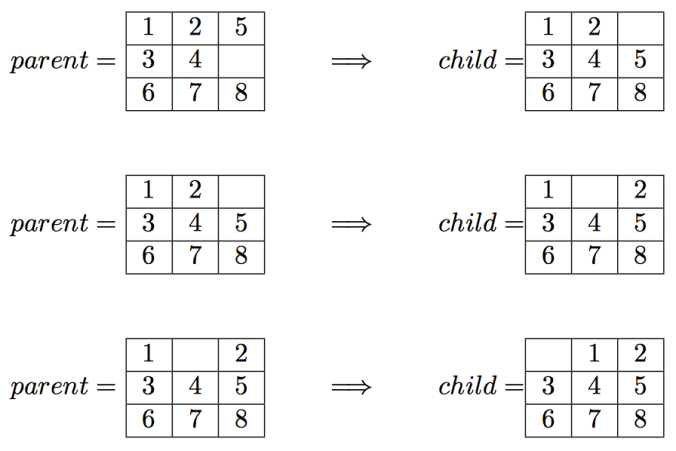

# IV.Code

In [ ]:

import sys
import numpy as np


class Node:
	def __init__(self, state, parent, action):
		self.state = state
		self.parent = parent
		self.action = action


class StackFrontier:
	def __init__(self):
		self.frontier = []

	def add(self, node):
		self.frontier.append(node)

	def contains_state(self, state):
		return any((node.state[0] == state[0]).all() for node in self.frontier)
	
	def empty(self):
		return len(self.frontier) == 0
	
	def remove(self):
		if self.empty():
			raise Exception("Empty Frontier")
		else:
			node = self.frontier[-1]
			self.frontier = self.frontier[:-1]
			return node


class QueueFrontier(StackFrontier):
	def remove(self):
		if self.empty():
			raise Exception("Empty Frontier")
		else:
			node = self.frontier[0]
			self.frontier = self.frontier[1:]
			return node


class Puzzle:
	def __init__(self, start, startIndex, goal, goalIndex):
		self.start = [start, startIndex]
		self.goal = [goal, goalIndex] 
		self.solution = None

	def neighbors(self, state):
		mat, (row, col) = state
		results = []
		
		if row > 0:
			mat1 = np.copy(mat)
			mat1[row][col] = mat1[row - 1][col]
			mat1[row - 1][col] = 0
			results.append(('up', [mat1, (row - 1, col)]))
		if col > 0:
			mat1 = np.copy(mat)
			mat1[row][col] = mat1[row][col - 1]
			mat1[row][col - 1] = 0
			results.append(('left', [mat1, (row, col - 1)]))
		if row < 2:
			mat1 = np.copy(mat)
			mat1[row][col] = mat1[row + 1][col]
			mat1[row + 1][col] = 0
			results.append(('down', [mat1, (row + 1, col)]))
		if col < 2:
			mat1 = np.copy(mat)
			mat1[row][col] = mat1[row][col + 1]
			mat1[row][col + 1] = 0
			results.append(('right', [mat1, (row, col + 1)]))

		return results

	def print(self):
		solution = self.solution if self.solution is not None else None
		print("Start State:\n", self.start[0], "\n")
		print("Goal State:\n",  self.goal[0], "\n")
		print("\nStates Explored: ", self.num_explored, "\n")
		print("Solution:\n ")
		for action, cell in zip(solution[0], solution[1]):
			print("action: ", action, "\n", cell[0], "\n")
		print("Goal Reached!!")

	def does_not_contain_state(self, state):
		for st in self.explored:
			if (st[0] == state[0]).all():
				return False
		return True
	
	def solve(self):
		self.num_explored = 0

		start = Node(state=self.start, parent=None, action=None)
		frontier = QueueFrontier()
		frontier.add(start)

		self.explored = [] 

		while True:
			if frontier.empty():
				raise Exception("No solution")

			node = frontier.remove()
			self.num_explored += 1

			if (node.state[0] == self.goal[0]).all():
				actions = []
				cells = []
				while node.parent is not None:
					actions.append(node.action)
					cells.append(node.state)
					node = node.parent
				actions.reverse()
				cells.reverse()
				self.solution = (actions,  cells)
				return

			self.explored.append(node.state)

			for action, state in self.neighbors(node.state):
				if not frontier.contains_state(state) and self.does_not_contain_state(state):
					child = Node(state=state, parent=node, action=action)
					frontier.add(child)


start = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])
goal = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])


startIndex = (1, 1)
goalIndex = (1, 0)


p = Puzzle(start, startIndex, goal, goalIndex)
p.solve()
p.print()